<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/07-trees/DecisionTrees_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Name: **Khushbu**

Last Name:**Saradva**

Group: mAIDA22, Data Science, 2022

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

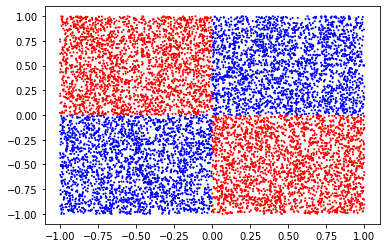

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

Train Accuracy: 1.0000


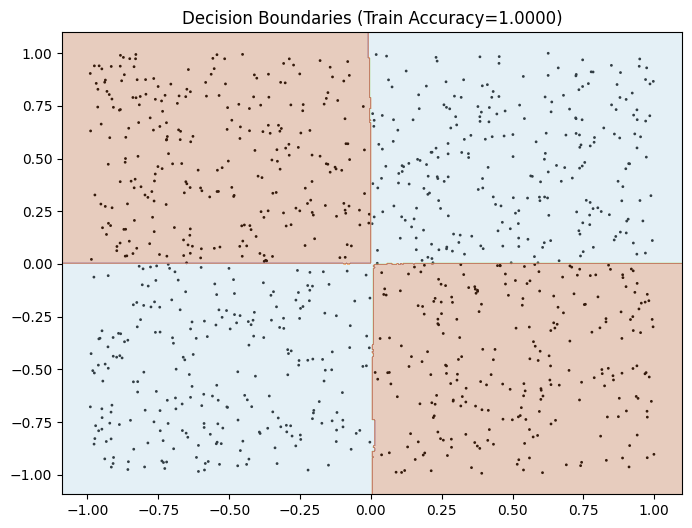

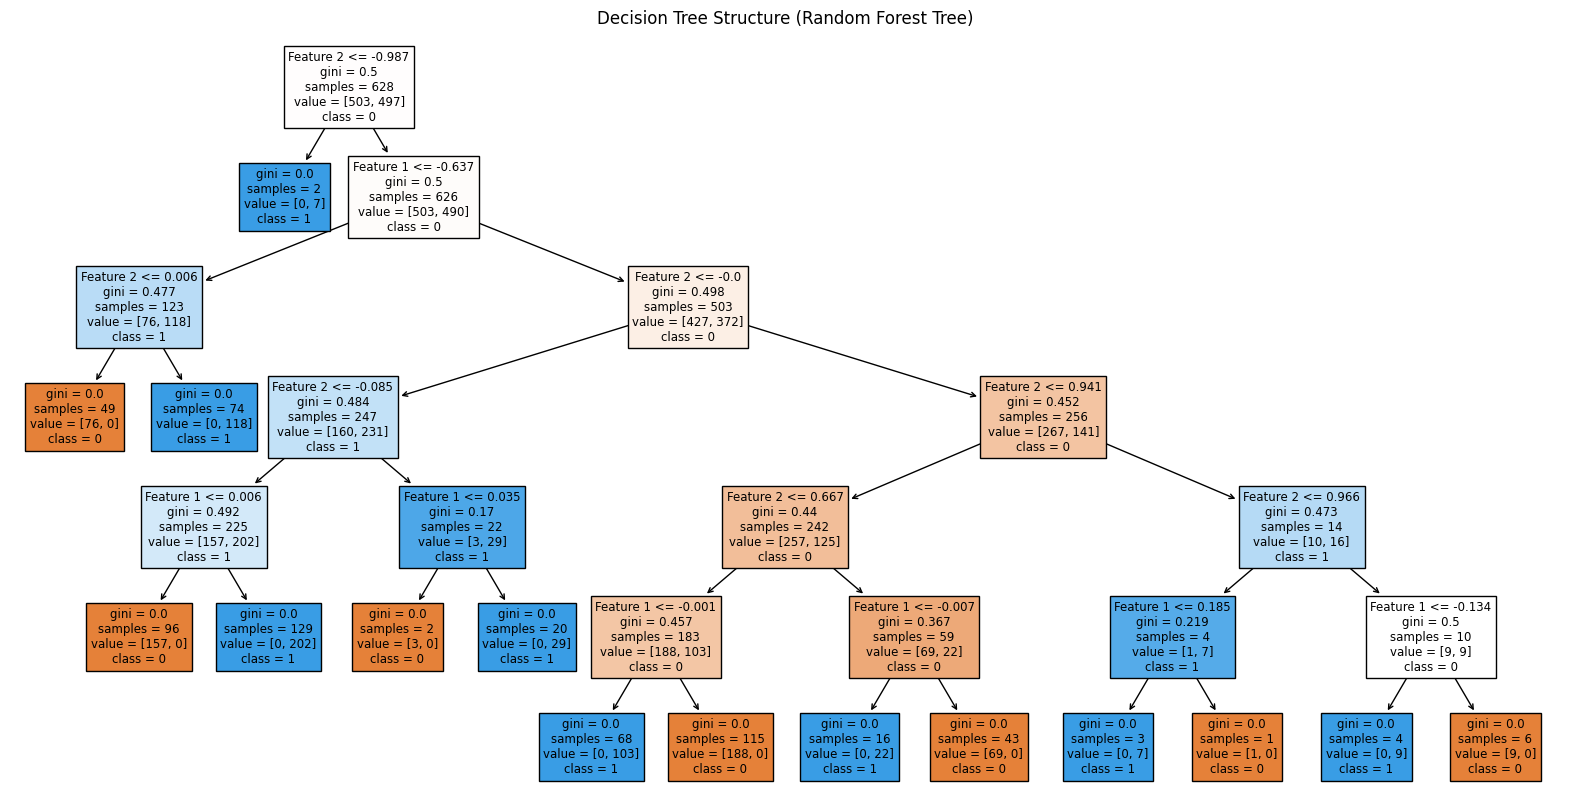

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

np.random.seed(42)
n_points = 1000
X = np.random.uniform(-1, 1, size=(n_points, 2))
y = np.logical_xor(X[:, 0] >= 0, X[:, 1] >= 0).astype(int)

# RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
train_accuracy = model.score(X, y)

print(f"Train Accuracy: {train_accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=1, edgecolor='k')

xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.xlim(xlim), plt.ylim(ylim)
plt.title(f'Decision Boundaries (Train Accuracy={train_accuracy:.4f})')
plt.show()

plt.figure(figsize=(20, 10))
estimator = model.estimators_[0]
plot_tree(estimator, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1'])
plt.title(f'Decision Tree Structure (Random Forest Tree)')
plt.show()


# Task 2 (3 points)

Consider the following dataset:

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

print(X.iloc[:5])
print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

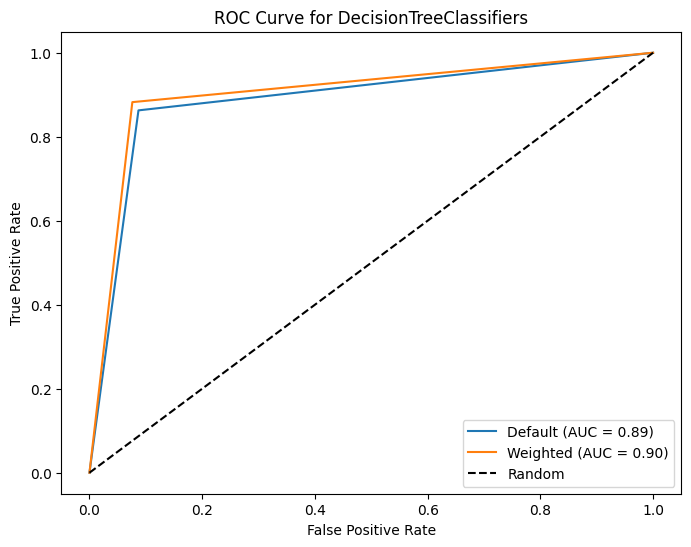

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# DecisionTreeClassifier
model_default = DecisionTreeClassifier(random_state=12345)
model_default.fit(X_train, y_train)

model_weighted = DecisionTreeClassifier(class_weight={'malignant': 2., 'benign': 1.}, random_state=12345)
model_weighted.fit(X_train, y_train)

probs_default = model_default.predict_proba(X_test)[:, 1]
probs_weighted = model_weighted.predict_proba(X_test)[:, 1]

fpr_default, tpr_default, _ = roc_curve(y_test == 'malignant', probs_default)
roc_auc_default = auc(fpr_default, tpr_default)

fpr_weighted, tpr_weighted, _ = roc_curve(y_test == 'malignant', probs_weighted)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, label=f'Default (AUC = {roc_auc_default:.2f})')
plt.plot(fpr_weighted, tpr_weighted, label=f'Weighted (AUC = {roc_auc_weighted:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifiers')
plt.legend(loc='lower right')
plt.show()

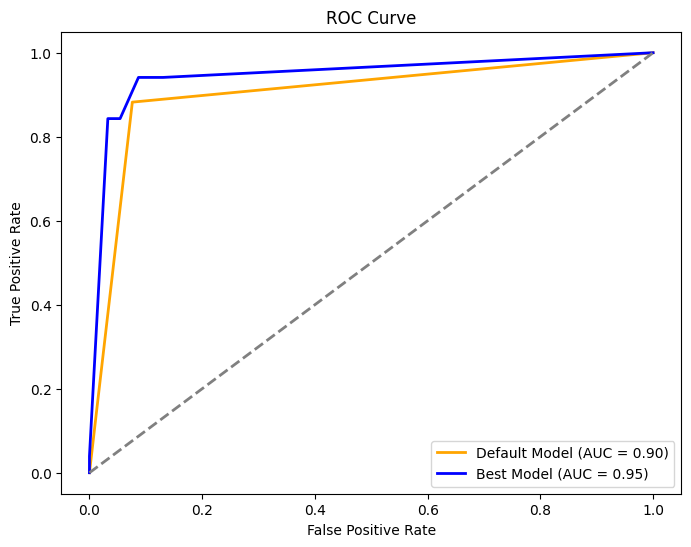

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

class_weights = {'malignant': 2., 'benign': 1.}

clf = DecisionTreeClassifier(class_weight=class_weights, random_state=12345)

clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:, 1]

fpr_default, tpr_default, _ = roc_curve(y_test == 'malignant', y_prob)
roc_auc_default = auc(fpr_default, tpr_default)

best_auc = 0
best_clf = None

for max_depth in range(1, 10):
    for min_samples_split in range(2, 10):
        clf = DecisionTreeClassifier(
            class_weight=class_weights,
            random_state=12345,
            max_depth=max_depth,
            min_samples_split=min_samples_split
        )
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test == 'malignant', y_prob)
        roc_auc = auc(fpr, tpr)

        if roc_auc > best_auc:
            best_auc = roc_auc
            best_clf = clf

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, color='orange', lw=2, label=f'Default Model (AUC = {roc_auc_default:.2f})')
y_prob_best = best_clf.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test == 'malignant', y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'Best Model (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()